In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import scipy.stats as stats
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

import Modeling3
import imp
imp.reload(Modeling3)
from Modeling3 import Catmodeling

In [21]:
# 날짜 정보가 있는 데이터
data = pd.read_csv('최종_동태.csv')
data.index = pd.to_datetime(data['회계년도'])
data.drop('회계년도', axis=1, inplace=True)

In [22]:
## feature selection을 통해 선택된 원래의 train data
df_train_original = pd.read_csv('동태3겹rus_train_origin.csv')
x_columns = list(df_train_original.drop(['부실여부'], axis=1).columns)
x_columns_target = list(df_train_original.columns)
len(x_columns_target)

25

In [23]:
### 학습데이터, 테스트 데이터로 분할
data_test = data[data.index >= datetime.strptime('2021-12-01', '%Y-%m-%d')]
data_train = data[data.index < datetime.strptime('2021-12-01', '%Y-%m-%d')]

# 회사명과 거래소 코드  정보를 남겨놓기 위한거
data_name = data_train[['회사명', '거래소코드']]

In [24]:
# # 원래 데이터와 생성된 가짜 데이터가 섞여있는거
# df_train_temp = pd.read_csv('CTGAN_oversampled_train_1_1.csv')    ######################### 스모트 비율에 맞는거를 불러오도록 해

In [25]:
# # 가짜 데이터 생성
# temptemp = df_train_temp[x_columns_target].merge(df_train_original[x_columns_target], indicator=True, how='outer')
# df_train_generated = temptemp[temptemp['_merge'] == 'left_only']
# df_train_generated.drop(['_merge'], axis=1, inplace=True)

In [26]:
# 진짜 데이터에 날짜 데이터 부여
df_train_original.index = data_train.index

In [27]:
# 테스트 데이터 불러오기
df_test = pd.read_csv('최종_동태_test.csv')
df_test.index = pd.to_datetime(df_test['회계년도'])
df_test.drop('회계년도', axis=1, inplace=True)

In [28]:
# # 진짜 데이터를 4개의 폴드로 나눈거
# fold1 = df_train_original[(df_train_original.index >= datetime.strptime('2012-12-01', '%Y-%m-%d')) & (df_train_original.index <= datetime.strptime('2014-12-01', '%Y-%m-%d'))].index
# fold2 = df_train_original[(df_train_original.index >= datetime.strptime('2015-12-01', '%Y-%m-%d')) & (df_train_original.index <= datetime.strptime('2016-12-01', '%Y-%m-%d'))].index
# fold3 = df_train_original[(df_train_original.index >= datetime.strptime('2017-12-01', '%Y-%m-%d')) & (df_train_original.index <= datetime.strptime('2018-12-01', '%Y-%m-%d'))].index
# fold4 = df_train_original[(df_train_original.index >= datetime.strptime('2019-12-01', '%Y-%m-%d')) & (df_train_original.index <= datetime.strptime('2020-12-01', '%Y-%m-%d'))].index

In [29]:
# # 생성된 데이터에 대해 랜덤하게 날짜를 부여
# import random

# weights = [len(fold1), len(fold2), len(fold3), len(fold4)]
# values = [list(fold1.unique()), list(fold2.unique()), list(fold3.unique()), list(fold4.unique())]
# generated_index = []
# for i in range(len(df_train_generated.index)):

#     selected_list = random.choices(values, weights=weights, k=1)[0]
#     selected_value = random.choice(selected_list)
#     generated_index.append(selected_value)

# df_train_generated.index = generated_index

In [30]:
# df_train = pd.concat([df_train_original, df_train_generated], axis=0)

In [31]:
df_train = df_train_original

In [32]:
df_train['부실여부'].value_counts()

부실여부
0.0    131308
1.0      5538
Name: count, dtype: int64

In [33]:
cat = Catmodeling(df_train, df_test, x_columns)

In [34]:
# params = cat.my_tuning()

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

최적의 threshold : 0.1108821662040993, 최적의 교차검증 f1 score : 0.3236215234621499
최적의 threshold : 0.07927506171553449, 최적의 교차검증 f1 score : 0.30808198867051145     
최적의 threshold : 0.10984669991471958, 최적의 교차검증 f1 score : 0.31030515995808505     
최적의 threshold : 0.10729680220423297, 최적의 교차검증 f1 score : 0.32173675726216255     
최적의 threshold : 0.11967571912033913, 최적의 교차검증 f1 score : 0.32591636707416655     
최적의 threshold : 0.10328969093851008, 최적의 교차검증 f1 score : 0.3212224117046793       
최적의 threshold : 0.07700013281265988, 최적의 교차검증 f1 score : 0.32170573724275303      
최적의 threshold : 0.07994178927094965, 최적의 교차검증 f1 score : 0.32408215987321126      
최적의 threshold : 0.11861472396460004, 최적의 교차검증 f1 score : 0.3228971873988293       
최적의 threshold : 0.1053017510570804, 최적의 교차검증 f1 score : 0.32797600411081496       
100%|██████████| 10/10 [05:53<00:00, 35.38s/trial, best loss: -0.32797600411081496]


In [35]:
# best_params_df = pd.DataFrame([params])
# best_params_df.to_csv('Catboost_동태3겹_리샘플링안함.csv', index=False)   ##################### 스모트 비율에 맞게 파일명 바꿔가면서 저장해

In [36]:
#### 여기는 csv 파일 불러오는거니 일단은 신경 안써도 됨
param_info = pd.read_csv('Catboost_동태3겹_ctgan1.csv')
param_dict = {}
for column in param_info:
    param_dict[column] = param_info[column].iloc[0]
param_dict

In [37]:
# weights = (df_train['부실여부'].value_counts()[0]/df_train['부실여부'].value_counts()[1])
# print(weights)
# class_weights = [1, weights] 
# param_dict['class_weights'] = class_weights

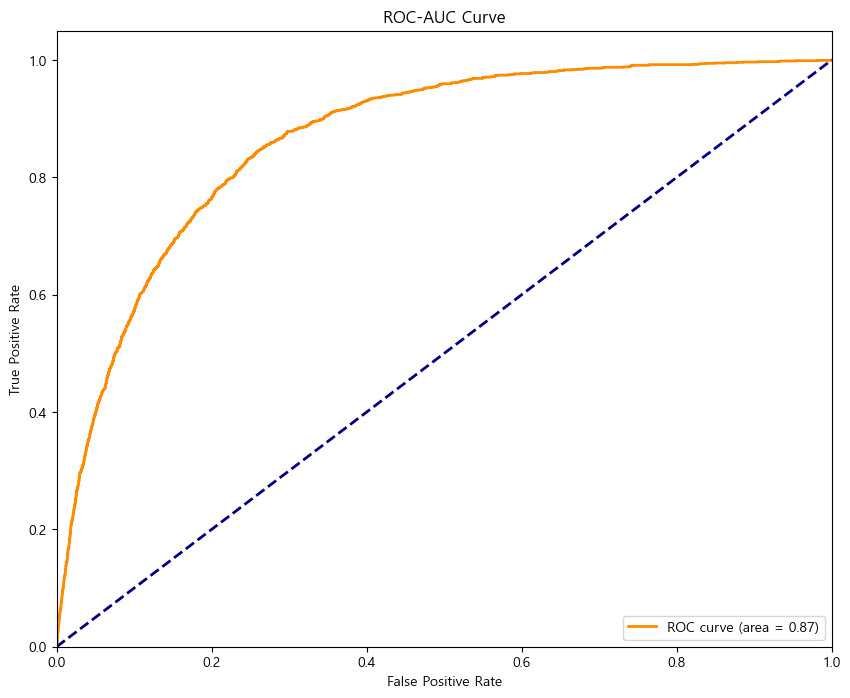

Threshold : 0.03341745102326468
혼돈행렬 : [[27737  8718]
 [  325  1463]]
정확도 : 0.7635
정밀도 : 0.1437
재현율 : 0.8182
roc_auc 스코어 : 0.7895
f1 스코어 : 0.2445


Threshold : 0.03854565615146981
혼돈행렬 : [[28535  7920]
 [  377  1411]]
정확도 : 0.783
정밀도 : 0.1512
재현율 : 0.7891
roc_auc 스코어 : 0.7859
f1 스코어 : 0.2538


Threshold : 0.04367386127967494
혼돈행렬 : [[29260  7195]
 [  426  1362]]
정확도 : 0.8007
정밀도 : 0.1592
재현율 : 0.7617
roc_auc 스코어 : 0.7822
f1 스코어 : 0.2633


Threshold : 0.04880206640788007
혼돈행렬 : [[29888  6567]
 [  462  1326]]
정확도 : 0.8162
정밀도 : 0.168
재현율 : 0.7416
roc_auc 스코어 : 0.7807
f1 스코어 : 0.2739


Threshold : 0.05393027153608519
혼돈행렬 : [[30435  6020]
 [  510  1278]]
정확도 : 0.8292
정밀도 : 0.1751
재현율 : 0.7148
roc_auc 스코어 : 0.7748
f1 스코어 : 0.2813


Threshold : 0.05905847666429032
혼돈행렬 : [[30900  5555]
 [  546  1242]]
정확도 : 0.8405
정밀도 : 0.1827
재현율 : 0.6946
roc_auc 스코어 : 0.7711
f1 스코어 : 0.2893


Threshold : 0.06418668179249545
혼돈행렬 : [[31353  5102]
 [  591  1197]]
정확도 : 0.8511
정밀도 : 0.19
재현율 : 0.6695
roc_auc

In [38]:
cat.my_modeling(param_dict)